### 로지스틱 회귀

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state=0)

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print("accuracy_score : {:0.3f}".format(accuracy_score(y_test, lr_preds)))
print("roc_auc_score : {:0.3f}".format(roc_auc_score(y_test, lr_preds)))

accuracy_score : 0.977
roc_auc_score : 0.972


In [9]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1']
           , 'C': [0.01,0.1,1,1,5,10] }

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)

print('최적 하이퍼파라미터: {0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))



최적 하이퍼파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.975


C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\model_selecti

### 회귀 트리

In [13]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 교차 검증의 개별 negative MSE scores : ", np.round(neg_mse_scores,2))
print("5 교차 검증의 개별 RMSE scores : ", np.round(rmse_scores,2))
print("5 교차 검증의 평ㄱ윤 RMSE scores : ", np.round(avg_rmse,2))

5 교차 검증의 개별 negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평ㄱ윤 RMSE scores :  4.42


In [16]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("5 교차 검증의 평균 RMSE scores : ", np.round(avg_rmse,2))
    


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)


models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models :
    get_model_cv_prediction(model,X_data, y_target )

5 교차 검증의 평균 RMSE scores :  5.98
5 교차 검증의 평균 RMSE scores :  4.42
5 교차 검증의 평균 RMSE scores :  4.27
5 교차 검증의 평균 RMSE scores :  4.25
5 교차 검증의 평균 RMSE scores :  4.65


<AxesSubplot:>

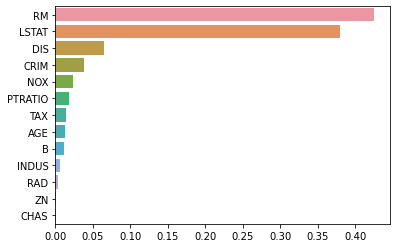

In [20]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg.fit(X_data, y_target)

feature_series= pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series= feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y=feature_series.index)